In [58]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [64]:
results = pd.read_csv('Results/Padding_10.csv', index_col=0)
results.head(5)

,Vendor,Centre,Dice_BG_ED,Dice_LV_ED,Dice_MYO_ED,Dice_RV_ED,Dice_BG_ES,Dice_LV_ES,Dice_MYO_ES,Dice_RV_ES,IoU_BG_ED,IoU_LV_ED,IoU_MYO_ED,IoU_RV_ED,IoU_BG_ES,IoU_LV_ES,IoU_MYO_ES,IoU_RV_ES
External code,,,,,,,,,,,,,,,,,,
A0S9V9,F,6,0.984954,0.946264,0.787813,0.904669,0.989875,0.926074,0.791440,0.853361,0.970354,0.898009,0.649910,0.825932,0.979953,0.862326,0.654862,0.744228
A1D0Q7,B,2,0.965086,0.906741,0.767271,0.738008,0.971552,0.731853,0.680277,0.583868,0.932527,0.829393,0.622417,0.584796,0.944678,0.577105,0.515470,0.412298
A1D9Z7,A,1,0.944744,0.710427,0.530560,0.721250,0.947501,0.556347,0.349296,0.684044,0.895274,0.550901,0.361063,0.564028,0.900239,0.385375,0.211604,0.519807
A1E9Q1,F,6,0.990236,0.962982,0.838590,0.947389,0.991402,0.940174,0.833333,0.912494,0.980662,0.928606,0.722045,0.900038,0.982951,0.887102,0.714286,0.839070
A1K2P5,D,5,0.981824,0.926114,0.760895,0.904748,0.988721,0.902500,0.816496,0.877281,0.964297,0.862396,0.614068,0.826064,0.977693,0.822323,0.689898,0.781390


In [65]:
grouped_by_vendor = results.groupby(['Vendor', 'Centre']).mean()
grouped_by_vendor

Dice_BG_ED  Dice_LV_ED  Dice_MYO_ED  Dice_RV_ED  Dice_BG_ES  \
Vendor Centre                                                                
A      1         0.970548    0.898530     0.762660    0.848118    0.979296   
B      2         0.974697    0.917869     0.778611    0.877647    0.977704   
       3         0.978865    0.937754     0.778757    0.885315    0.982455   
C      4         0.974612    0.883513     0.717983    0.811363    0.978920   
D      5         0.971394    0.887033     0.716345    0.851936    0.977545   
F      6         0.987635    0.952700     0.845828    0.924542    0.990306   

               Dice_LV_ES  Dice_MYO_ES  Dice_RV_ES  IoU_BG_ED  IoU_LV_ED  \
Vendor Centre                                                              
A      1         0.850388     0.744862    0.788995   0.943165   0.822711   
B      2         0.775035     0.736939    0.760635   0.950802   0.850331   
       3         0.818590     0.763920    0.803835   0.958708   0.883807   
C      4         0.761504     0.714095    0.725382   0.950809   0.797926   
D      5         0.797907     0.748922    0.761230   0.944619   0.800727   
F      6         0.910212     0.840803    0.878662   0.975595   0.910013   

               IoU_MYO_ED  IoU_RV_ED  IoU_BG_ES  IoU_LV_ES  IoU_MYO_ES  \
Vendor Centre                                                            
A      1         0.623185   0.743505   0.959697   0.748896    0.603950   
B      2         0.640359   0.786014   0.956541   0.643196    0.589077   
       3         0.639425   0.798455   0.965605   0.703710    0.621115   
C      4         0.567461   0.708745   0.958907   0.629289    0.563029   
D      5         0.561429   0.749495   0.956267   0.683310    0.602635   
F      6         0.733575   0.860978   0.980821   0.838133    0.726031   

               IoU_RV_ES  
Vendor Centre             
A      1        0.662227  
B      2        0.625275  
       3        0.682299  
C      4        0.594170  
D      5        0.628567  
F      6        0.786463

In [66]:
grouped_by_vendor = results.groupby(['Vendor', 'Centre']).mean()
grouped_by_vendor

Dice_BG_ED  Dice_LV_ED  Dice_MYO_ED  Dice_RV_ED  Dice_BG_ES  \
Vendor Centre                                                                
A      1         0.970548    0.898530     0.762660    0.848118    0.979296   
B      2         0.974697    0.917869     0.778611    0.877647    0.977704   
       3         0.978865    0.937754     0.778757    0.885315    0.982455   
C      4         0.974612    0.883513     0.717983    0.811363    0.978920   
D      5         0.971394    0.887033     0.716345    0.851936    0.977545   
F      6         0.987635    0.952700     0.845828    0.924542    0.990306   

               Dice_LV_ES  Dice_MYO_ES  Dice_RV_ES  IoU_BG_ED  IoU_LV_ED  \
Vendor Centre                                                              
A      1         0.850388     0.744862    0.788995   0.943165   0.822711   
B      2         0.775035     0.736939    0.760635   0.950802   0.850331   
       3         0.818590     0.763920    0.803835   0.958708   0.883807   
C      4         0.761504     0.714095    0.725382   0.950809   0.797926   
D      5         0.797907     0.748922    0.761230   0.944619   0.800727   
F      6         0.910212     0.840803    0.878662   0.975595   0.910013   

               IoU_MYO_ED  IoU_RV_ED  IoU_BG_ES  IoU_LV_ES  IoU_MYO_ES  \
Vendor Centre                                                            
A      1         0.623185   0.743505   0.959697   0.748896    0.603950   
B      2         0.640359   0.786014   0.956541   0.643196    0.589077   
       3         0.639425   0.798455   0.965605   0.703710    0.621115   
C      4         0.567461   0.708745   0.958907   0.629289    0.563029   
D      5         0.561429   0.749495   0.956267   0.683310    0.602635   
F      6         0.733575   0.860978   0.980821   0.838133    0.726031   

               IoU_RV_ES  
Vendor Centre             
A      1        0.662227  
B      2        0.625275  
       3        0.682299  
C      4        0.594170  
D      5        0.628567  
F      6        0.786463

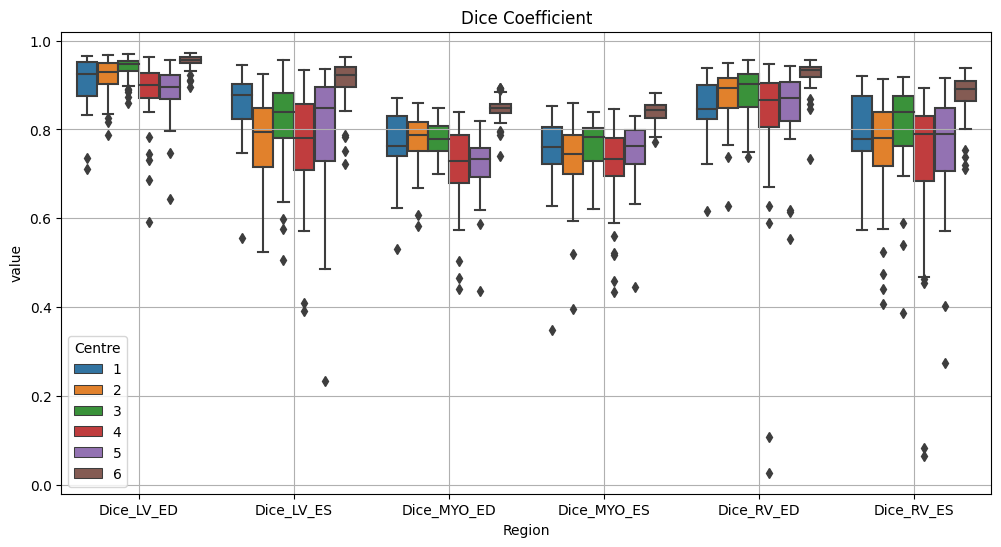

In [67]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['Dice_LV_ED',
                                'Dice_LV_ES',
                                'Dice_MYO_ED',
                                'Dice_MYO_ES',
                                'Dice_RV_ED',              
                                'Dice_RV_ES'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("Dice Coefficient")
plt.grid(True)
plt.show()

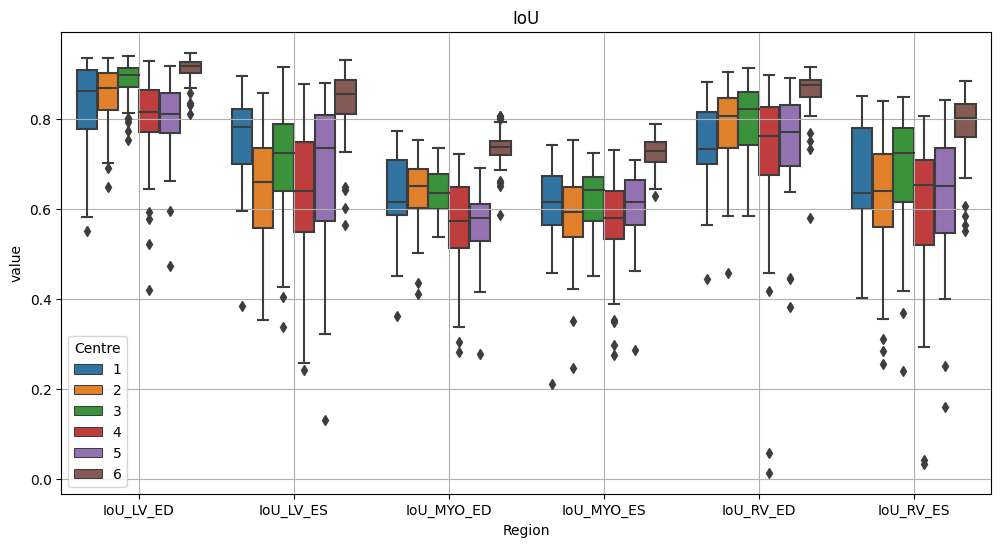

In [68]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['IoU_LV_ED',
                                'IoU_LV_ES',
                                'IoU_MYO_ED',
                                'IoU_MYO_ES',
                                'IoU_RV_ED',              
                                'IoU_RV_ES'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("IoU")
plt.grid(True)
plt.show()

In [38]:
results2 = pd.read_csv('Results/Cross_Entropy.csv', index_col=0)
results2.head(5)

,Vendor,Centre,Dice_BG_ED,Dice_LV_ED,Dice_MYO_ED,Dice_RV_ED,Dice_BG_ES,Dice_LV_ES,Dice_MYO_ES,Dice_RV_ES,IoU_BG_ED,IoU_LV_ED,IoU_MYO_ED,IoU_RV_ED,IoU_BG_ES,IoU_LV_ES,IoU_MYO_ES,IoU_RV_ES
External code,,,,,,,,,,,,,,,,,,
A0S9V9,F,6,0.985017,0.955228,0.795083,0.914165,0.986650,0.950450,0.808746,0.802920,0.970476,0.914293,0.659866,0.841901,0.973652,0.905578,0.678904,0.670732
A1D0Q7,B,2,0.963962,0.901167,0.780801,0.748627,0.963632,0.784364,0.734058,0.494219,0.930432,0.820112,0.640421,0.598245,0.929817,0.645229,0.579851,0.328214
A1D9Z7,A,1,0.954384,0.748674,0.563096,0.827172,0.945888,0.672226,0.551510,0.704954,0.912748,0.598305,0.391881,0.705279,0.897331,0.506281,0.380748,0.544346
A1E9Q1,F,6,0.988230,0.967708,0.848049,0.943353,0.992169,0.951753,0.851131,0.926452,0.976733,0.937436,0.736185,0.892780,0.984460,0.907947,0.740842,0.862981
A1K2P5,D,5,0.988581,0.940715,0.771913,0.952135,0.988703,0.885078,0.815898,0.865238,0.977420,0.888065,0.628549,0.908643,0.977657,0.793847,0.689043,0.762483


In [22]:
results3 = pd.read_csv('Results/Cross_Entropy.csv', index_col=0)

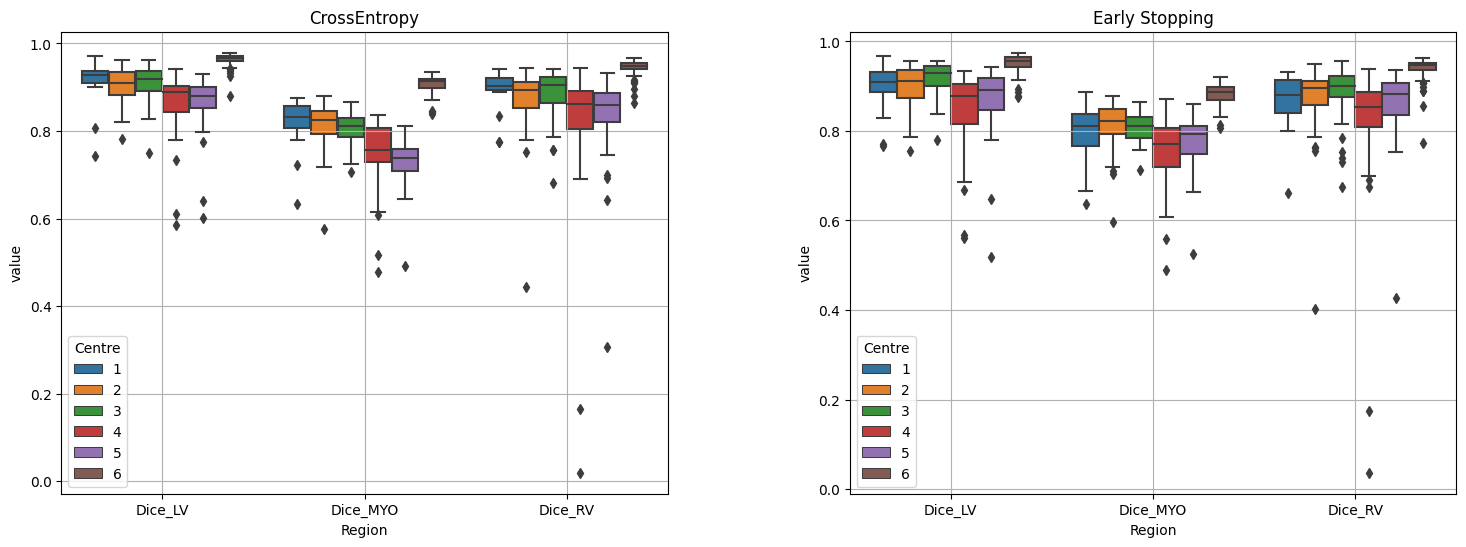

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=results2.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_MYO', 'Dice_RV'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax1)

ax1.set_title("CrossEntropy")
ax1.grid(True)

sns.boxplot(data=results3.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_MYO', 'Dice_RV'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax2)

ax2.set_title("Early Stopping")
ax2.grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()